In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#lets check rows and columns
df.shape

(731, 16)

In [3]:
df1=pd.read_csv("hour.csv")

In [5]:
df1.shape

(17379, 17)

In [4]:
#add to dataset
df=pd.concat([df,df1],ignore_index=True)

C:\Users\vishwaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
#lets check top five data
df.head()

,atemp,casual,cnt,dteday,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
0,0.363625,331,985,2011-01-01,0,NaN,0.805833,1,1,654,1,0.344167,2,6,0.160446,0,0
1,0.353739,131,801,2011-01-02,0,NaN,0.696087,2,1,670,1,0.363478,2,0,0.248539,0,0
2,0.189405,120,1349,2011-01-03,0,NaN,0.437273,3,1,1229,1,0.196364,1,1,0.248309,1,0
3,0.212122,108,1562,2011-01-04,0,NaN,0.590435,4,1,1454,1,0.200000,1,2,0.160296,1,0
4,0.229270,82,1600,2011-01-05,0,NaN,0.436957,5,1,1518,1,0.226957,1,3,0.186900,1,0


In [6]:
#lets check whether columns are having null values or not
df.isnull().sum()

atemp           0
casual          0
cnt             0
dteday          0
holiday         0
hr            731
hum             0
instant         0
mnth            0
registered      0
season          0
temp            0
weathersit      0
weekday         0
windspeed       0
workingday      0
yr              0
dtype: int64

In [9]:
df.shape

(18110, 17)

In [7]:
#lets fill the null values with mean
df['hr']=df['hr'].fillna(df['hr'].mean())

In [8]:
#lets check again whether there are any null values or not
df.isnull().sum()

atemp         0
casual        0
cnt           0
dteday        0
holiday       0
hr            0
hum           0
instant       0
mnth          0
registered    0
season        0
temp          0
weathersit    0
weekday       0
windspeed     0
workingday    0
yr            0
dtype: int64

In [9]:
#lets see some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
atemp         18110 non-null float64
casual        18110 non-null int64
cnt           18110 non-null int64
dteday        18110 non-null object
holiday       18110 non-null int64
hr            18110 non-null float64
hum           18110 non-null float64
instant       18110 non-null int64
mnth          18110 non-null int64
registered    18110 non-null int64
season        18110 non-null int64
temp          18110 non-null float64
weathersit    18110 non-null int64
weekday       18110 non-null int64
windspeed     18110 non-null float64
workingday    18110 non-null int64
yr            18110 non-null int64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


In [13]:
#lets describe the dataset
df.describe()

,atemp,casual,cnt,holiday,hr,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
count,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
mean,0.475718,68.472336,363.631033,0.028769,11.546752,0.627256,8354.006405,6.537051,295.158697,2.501436,0.496922,1.424075,3.003424,0.190113,0.682772,0.502485
std,0.171496,216.588054,950.827954,0.167160,6.773412,0.191147,5180.771860,3.439213,771.555142,1.107045,0.192177,0.635830,2.005677,0.120851,0.465410,0.500008
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333300,4.000000,43.000000,0.000000,6.000000,0.480000,3797.250000,4.000000,37.000000,2.000000,0.340000,1.000000,1.000000,0.104500,0.000000,0.000000
50%,0.484800,18.000000,152.000000,0.000000,11.546752,0.630000,8324.500000,7.000000,123.000000,3.000000,0.500000,1.000000,3.000000,0.188950,1.000000,1.000000
75%,0.621200,55.000000,305.000000,0.000000,17.000000,0.780000,12851.750000,10.000000,238.000000,3.000000,0.660000,2.000000,5.000000,0.253700,1.000000,1.000000
max,1.000000,3410.000000,8714.000000,1.000000,23.000000,1.000000,17379.000000,12.000000,6946.000000,4.000000,1.000000,4.000000,6.000000,0.850700,1.000000,1.000000


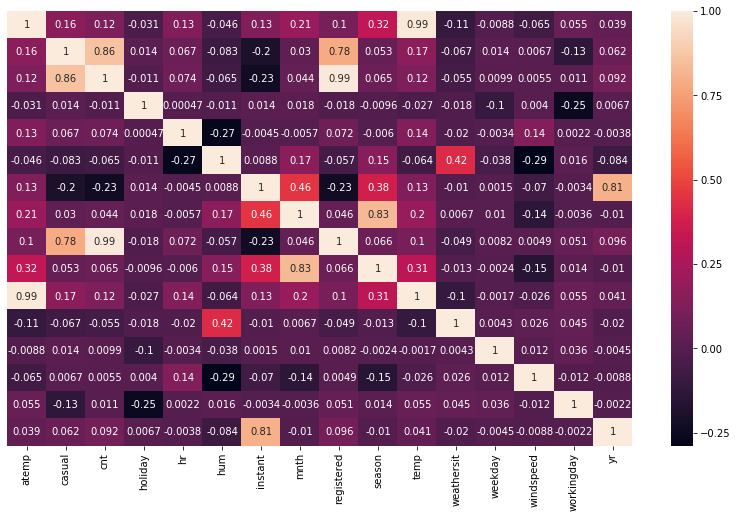

In [10]:
#lets check correlation matrix through heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),yticklabels=False,annot=True)

In [15]:
df.shape

(18110, 17)

In [16]:
df.skew()

atemp        -0.091740
casual        7.883938
cnt           5.487878
holiday       5.638702
hr           -0.010902
hum          -0.111159
instant       0.027084
mnth         -0.009211
registered    5.491346
season       -0.005214
temp         -0.007612
weathersit    1.223930
weekday      -0.002767
windspeed     0.579289
workingday   -0.785510
yr           -0.009940
dtype: float64

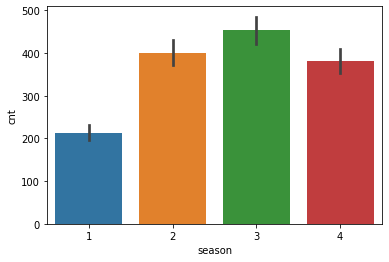

In [17]:
sns.barplot(x="season",y="cnt",data=df)

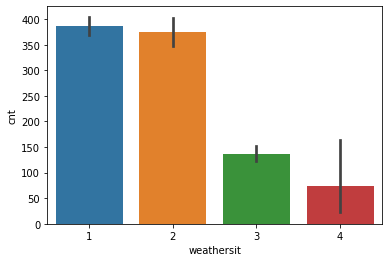

In [18]:
sns.barplot(x="weathersit",y="cnt",data=df)

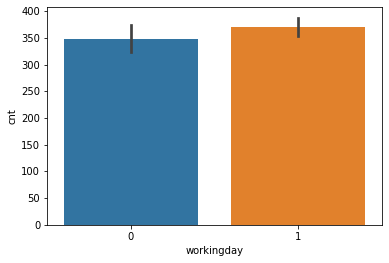

In [19]:
sns.barplot(x="workingday",y="cnt",data=df)

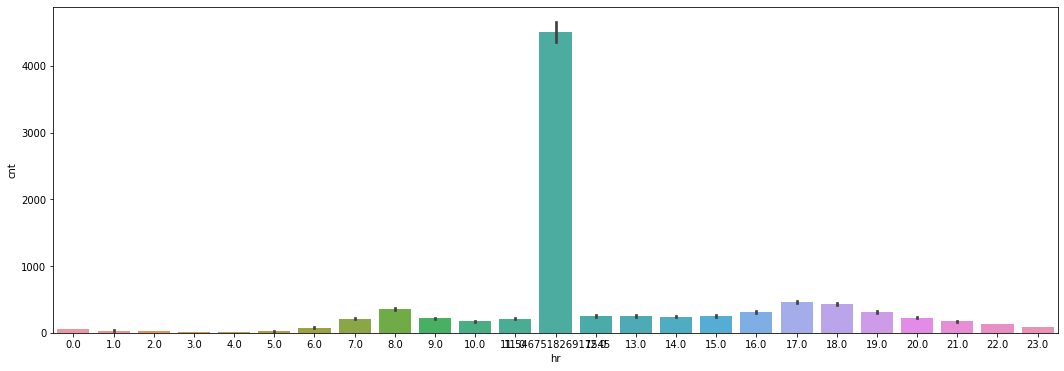

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(x="hr",y="cnt",data=df)
plt.show()

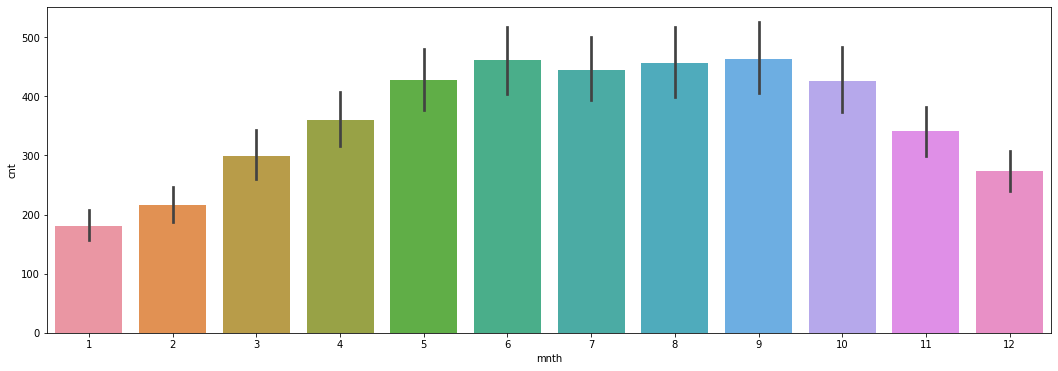

In [21]:
plt.figure(figsize=(18,6))
sns.barplot(x="mnth",y="cnt",data=df)
plt.show()

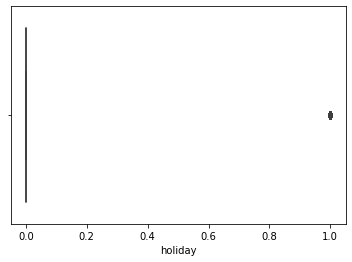

In [22]:
sns.boxplot(x='holiday',data=df)

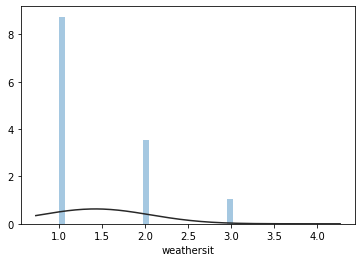

In [23]:
#cnt is slightly right skewed 
from scipy.stats import norm
sns.distplot(df['weathersit'],fit=norm, kde=False)

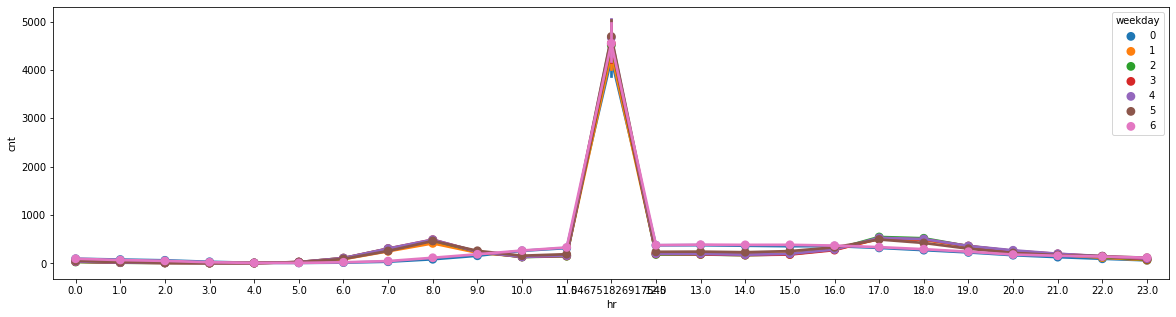

In [24]:
#lets chcek how count changes with with days in a week
plt.figure(figsize=(20,5))
sns.pointplot(x="hr",y="cnt",hue="weekday",data=df)
plt.show()

In [25]:
df.skew()

atemp        -0.091740
casual        7.883938
cnt           5.487878
holiday       5.638702
hr           -0.010902
hum          -0.111159
instant       0.027084
mnth         -0.009211
registered    5.491346
season       -0.005214
temp         -0.007612
weathersit    1.223930
weekday      -0.002767
windspeed     0.579289
workingday   -0.785510
yr           -0.009940
dtype: float64

In [11]:
x=df.drop(columns=["casual","registered","cnt","dteday"])
y=df[["cnt"]]

In [12]:
#lets remove the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 42,test_size=0.20)
model=[LinearRegression(),SVR(),KNeighborsRegressor(),XGBRegressor(),
       DecisionTreeRegressor(),RandomForestRegressor()]

In [31]:
#lets check which model perform best
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("model",m , r2_score(y_test,pred))
    print()
    print()

model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.821377398599983


model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) -0.013610516676126005


model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') 0.8596558197701318


[06:11:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:

In [16]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [34]:
rfr=RandomForestRegressor(n_estimators=500)
maxr2_score(rfr,x,y)

max r2 score corresponding to  81  is  0.9858710514879951


81

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 81,test_size=0.20)
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

C:\Users\vishwaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r2_score is: ",r2_score(y_test,y_pred))

MSE is:  14112.849633103257
r2_score is:  0.9859107621216415


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfr,x,y,cv=5,scoring="r2")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'min_samples_leaf':[1,2,3,4],'min_samples_split':[2,3,4,5],'criterion':['mae','mse']}
dc=DecisionTreeRegressor()
clf = GridSearchCV(dc, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

In [ ]:
dc=DecisionTreeRegressor(criterion= 'mae',
min_samples_leaf= 4,
min_samples_split= 5)
maxr2_score(dc,x,y)